In [ ]:
# !pip install pydicom -q

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import glob
from PIL import Image
import os
import shutil

In [ ]:
!unzip -q /content/drive/MyDrive/datasets/ds4.zip -d ./ds4/

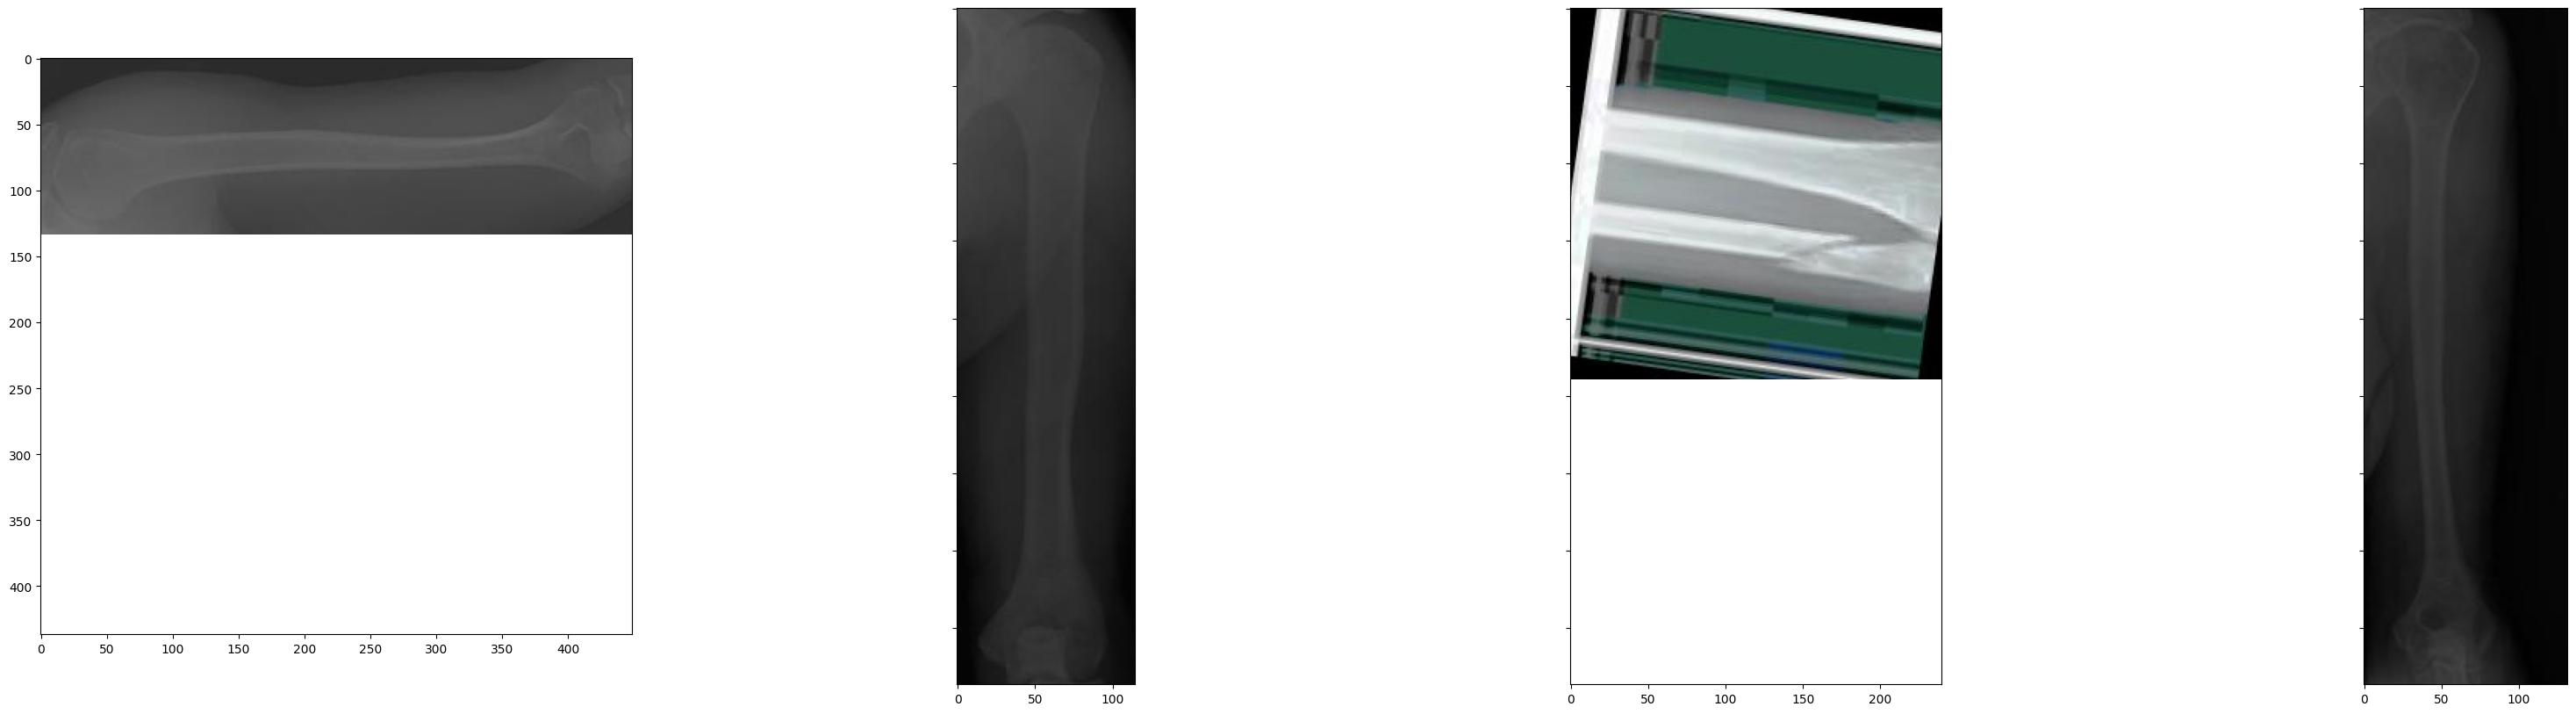

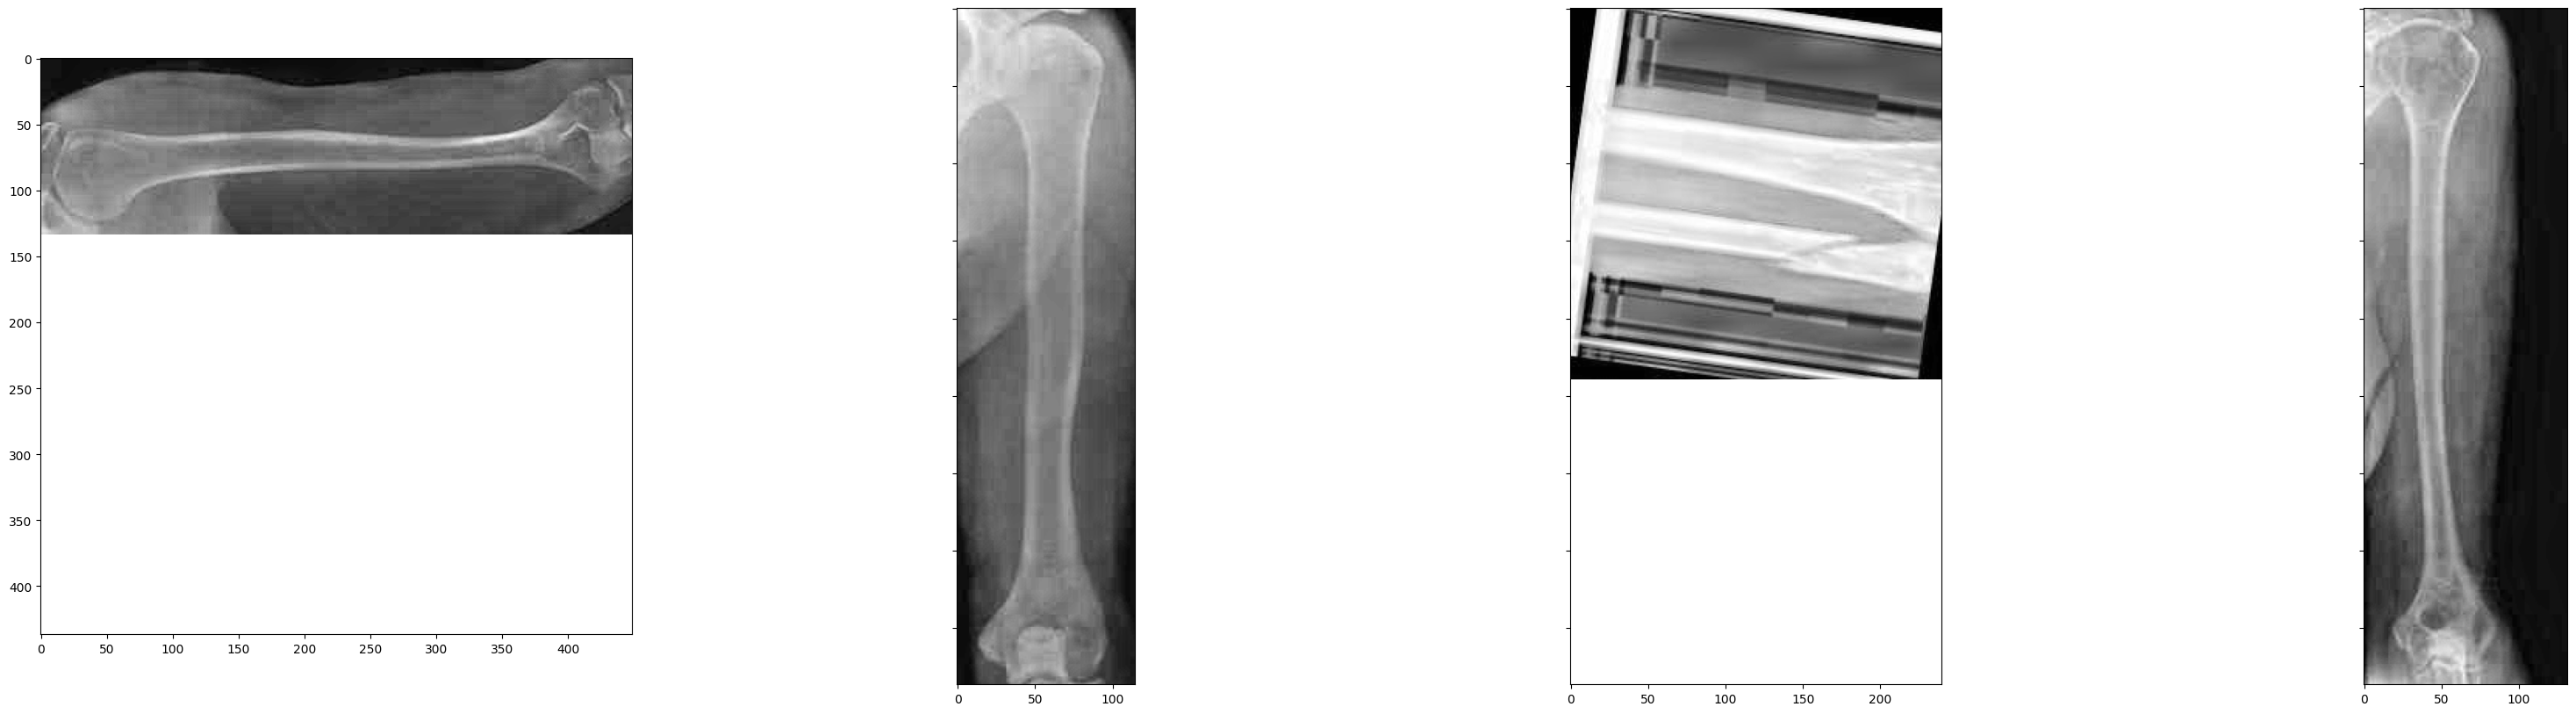

In [ ]:
start = 387   # Starting index of images
num_img = 4 # Total number of images to show
pattern = '/content/ds4/train/images/*.jpg'

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob.glob(pattern)[start:start+num_img]):
    image = Image.open(file_path)
    ax[q].imshow(np.asarray(image))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob.glob(pattern)[start:start+num_img]):
    image = Image.open(file_path)
    gray = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY)
    img_clahe = clahe.apply(gray)
    ax[q].imshow(img_clahe, cmap=plt.cm.gray)

In [ ]:
shutil.rmtree('./augmented_images/')

In [ ]:
os.mkdir('./augmented_images')
for i in ('test', 'train', 'valid'):
  os.mkdir(f'./augmented_images/{i}')
  os.mkdir(f'./augmented_images/{i}/images')

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
for folder in ('train', 'valid', 'test'):
  source = f'/content/ds4/{folder}/images'
  target = f'/content/augmented_images/{folder}/images'
  for q, filename in enumerate(os.listdir(source)):
    image = Image.open(f"{source}/{filename}")
    gray = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY)
    img_clahe = clahe.apply(gray)
    cv2.imwrite(f'{target}/{filename}', img_clahe)

In [ ]:
!cd augmented_images && zip -r ../ds4_augmented.zip .

/bin/bash: line 1: cd: augmented_images: No such file or directory


In [ ]:
import shutil

shutil.copyfile('/content/ds4_augmented.zip', '/content/drive/MyDrive/datasets/ds4_augmented.zip')

'/content/drive/MyDrive/datasets/ds4_augmented.zip'